
# ЛР 4. Определение стационарности временного ряда  

Выполнил Малышев Андрей, ШАД-311

**Задания:** генерация шума, добавление тренда, анализ `passengers.csv` (разбиение, логарифм), ADF-тесты, сравнение `regression`.


In [1]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.stattools import adfuller

np.random.seed(42)


## Задание 1

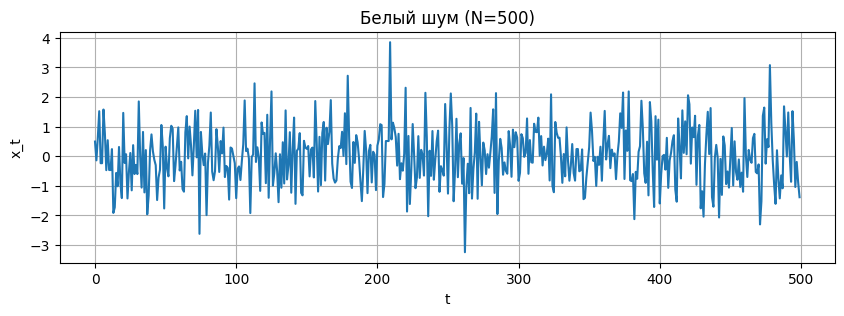

ADF white_noise: stat=-22.3438, p=0.000000, lags=0, nobs=499


In [2]:

# a) Белый гауссовский шум (N=500, mu=0, sigma^2=1)
N = 500
white_noise = np.random.normal(0.0, 1.0, N)

# b) График
plt.figure(figsize=(10, 3))
plt.plot(white_noise)
plt.title("Белый шум (N=500)")
plt.xlabel("t"); plt.ylabel("x_t"); plt.grid(True)
plt.show()

# c) ADF-тест (alpha=0.05). p-value — второе возвращаемое значение.
adf_wn = adfuller(white_noise, regression="c", autolag="AIC")
print("ADF white_noise: stat=%.4f, p=%.6f, lags=%d, nobs=%d" % (adf_wn[0], adf_wn[1], adf_wn[2], adf_wn[3]))


## Задание 2

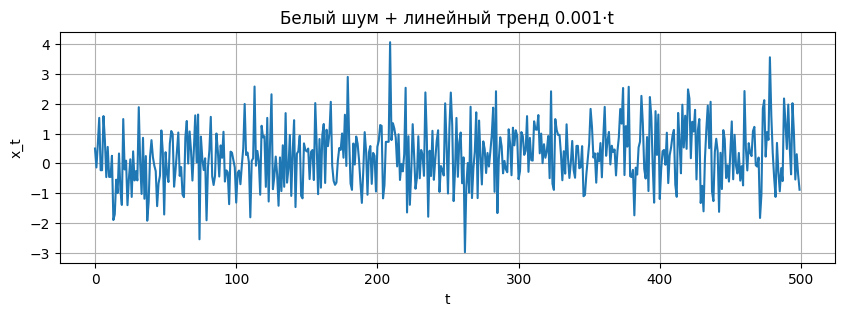

ADF noise_with_trend: stat=-21.7302, p=0.000000, lags=0, nobs=499


In [3]:
# a) Добавление тренда 0.001*x
t = np.arange(N)
trend = 0.001 * t
noise_with_trend = white_noise + trend

# b) График
plt.figure(figsize=(10, 3))
plt.plot(noise_with_trend)
plt.title("Белый шум + линейный тренд 0.001·t")
plt.xlabel("t"); plt.ylabel("x_t"); plt.grid(True)
plt.show()

# c) ADF-тест
adf_tr = adfuller(noise_with_trend, regression="c", autolag="AIC")
print("ADF noise_with_trend: stat=%.4f, p=%.6f, lags=%d, nobs=%d" % (adf_tr[0], adf_tr[1], adf_tr[2], adf_tr[3]))


## Задание 3

Статистики по 3 частям исходного ряда:
   Часть   N     Среднее    Дисперсия
0      1  48  158.375000  1094.664894
1      2  48  269.041667  3105.998227
2      3  48  413.479167  6161.999557

Статистики по 3 частям логарифмированного ряда:
   Часть   N  Среднее (лог)  Дисперсия (лог)
0      1  48       5.043911         0.042901
1      2  48       5.574733         0.040512
2      3  48       6.007884         0.033400

ADF Passengers: stat=0.8154, p=0.991880, lags=13, nobs=130
ADF log(Passengers): stat=-1.7170, p=0.422367, lags=13, nobs=130


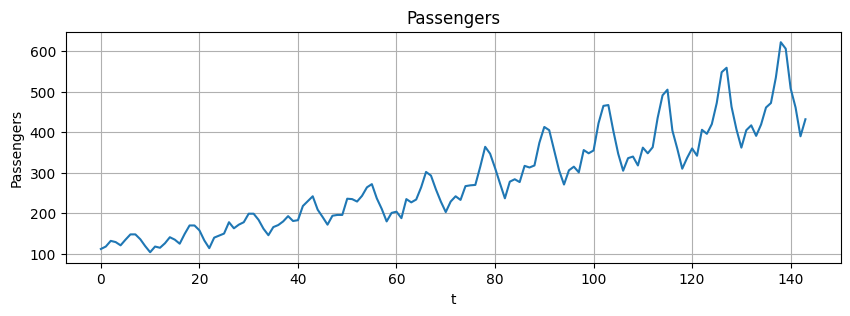

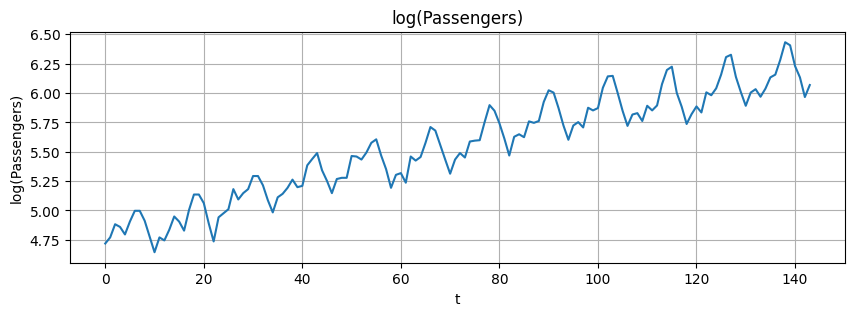

In [4]:
df = pd.read_csv("passengers.csv")
s = df["#Passengers"].astype(float).to_numpy()

# Разбить на 3 части; посчитать среднее и дисперсию
parts = np.array_split(s, 3)
means = [p.mean() for p in parts]
vars_ = [p.var(ddof=1) for p in parts]

tbl = pd.DataFrame({
    "Часть": [1,2,3],
    "N": [len(p) for p in parts],
    "Среднее": means,
    "Дисперсия": vars_,
})
print("Статистики по 3 частям исходного ряда:")
print(tbl)

log_s = np.log(s)
parts_log = np.array_split(log_s, 3)
means_log = [p.mean() for p in parts_log]
vars_log = [p.var(ddof=1) for p in parts_log]

tbl_log = pd.DataFrame({
    "Часть": [1,2,3],
    "N": [len(p) for p in parts_log],
    "Среднее (лог)": means_log,
    "Дисперсия (лог)": vars_log,
})
print("\nСтатистики по 3 частям логарифмированного ряда:")
print(tbl_log)

adf_orig = adfuller(s, regression="c", autolag="AIC")
adf_log  = adfuller(log_s, regression="c", autolag="AIC")
print("\nADF Passengers: stat=%.4f, p=%.6f, lags=%d, nobs=%d" % (adf_orig[0], adf_orig[1], adf_orig[2], adf_orig[3]))
print("ADF log(Passengers): stat=%.4f, p=%.6f, lags=%d, nobs=%d" % (adf_log[0], adf_log[1], adf_log[2], adf_log[3]))

# Графики (исходный и логарифмированный)
plt.figure(figsize=(10, 3))
plt.plot(s); plt.title("Passengers"); plt.xlabel("t"); plt.ylabel("Passengers"); plt.grid(True)
plt.show()

plt.figure(figsize=(10, 3))
plt.plot(log_s); plt.title("log(Passengers)"); plt.xlabel("t"); plt.ylabel("log(Passengers)"); plt.grid(True)
plt.show()


## Задание 4

In [5]:
# DF-тест с regression in ['ct','ctt','n'] для исходного и логарифмированного рядов
regs = ['ct', 'ctt', 'n']
rows = []
for reg in regs:
    r1 = adfuller(s, regression=reg, autolag="AIC")
    r2 = adfuller(log_s, regression=reg, autolag="AIC")
    rows.append(["Passengers", reg, r1[0], r1[1], r1[2], r1[3]])
    rows.append(["log(Passengers)", reg, r2[0], r2[1], r2[2], r2[3]])

res = pd.DataFrame(rows, columns=["series","regression","stat","pvalue","lags","nobs"])
print(res)


            series regression      stat    pvalue  lags  nobs
0       Passengers         ct -2.100782  0.545659    13   130
1  log(Passengers)         ct -2.147030  0.519681    13   130
2       Passengers        ctt -3.233678  0.195942    13   130
3  log(Passengers)        ctt -3.218751  0.201547    13   130
4       Passengers          n  2.390602  0.997180    13   130
5  log(Passengers)          n  2.483278  0.997997    13   130


# Заключение и выводы
- Белый шум — стационарный.
- Добавление линейного тренда делает ряд нестационарным.
- У passengers среднее и дисперсия растут → ряд нестационарен.
- Логарифм стабилизирует дисперсию, но тренд сохраняется.
ADF-тест подтверждает нестационарность исходного и логарифмированного рядов.
- Для стационарности требуется дифференцирование.